using data for either 1x2 or 2x4 bricks and no bricks on the picture: 3 classes
also adding transformations to the training data as explained here: https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

accuracy: 81.25% with 5 epochs
accurancy: 93.75% with 10 epochs

In [12]:
print ('IMPORTING modules')

from PIL import Image
import numpy as np
import os
from random import shuffle
import matplotlib.pyplot as plt

DIR = './train/3001_11_Brick-2x4'

print (DIR)

# Want to know how we should format the height x width image data dimensions
# for inputting to a keras model
def get_size_statistics():
    heights = []
    widths = []
    img_count = 0
    for img in os.listdir(DIR):
        path = os.path.join(DIR, img)
        if "DS_Store" not in path:
            data = np.array(Image.open(path))
            heights.append(data.shape[0])
            widths.append(data.shape[1])
            img_count += 1
    avg_height = sum(heights) / len(heights)
    avg_width = sum(widths) / len(widths)
    print("Average Height: " + str(avg_height))
    print("Max Height: " + str(max(heights)))
    print("Min Height: " + str(min(heights)))
    print('\n')
    print("Average Width: " + str(avg_width))
    print("Max Width: " + str(max(widths)))
    print("Min Width: " + str(min(widths)))

#get_size_statistics()

IMPORTING modules
./train/3001_11_Brick-2x4


In [13]:
IMG_Width = 300
IMG_Heigth = 300

In [3]:
#SKIP this is better done outside of the flow as a separate python script
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

print ("3001 brick")
DIR = './train/3001_11_Brick-2x4'
for file in os.listdir(DIR):
    img = load_img(os.path.join(DIR, file))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    filename = os.path.splitext(file)[0]
    print (filename)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    # the .flow() command below generates batches of randomly transformed images
    # and saves the results to the `preview/` directory
    i = 0
    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir='./preview', save_prefix=filename, save_format='jpeg'):
        i += 1
        if i > 20:
            break  # otherwise the generator would loop indefinitely

print ("3004 brick")
DIR = './train/3004_11_Brick-1x2'
for file in os.listdir(DIR):
    img = load_img(os.path.join(DIR, file))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    filename = os.path.splitext(file)[0]
    print (filename)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    # the .flow() command below generates batches of randomly transformed images
    # and saves the results to the `preview/` directory
    i = 0
    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir='./preview', save_prefix=filename, save_format='jpeg'):
        i += 1
        if i > 20:
            break  # otherwise the generator would loop indefinitely
            
print ("no brick")
DIR = './train/0000_00_No-Brick'
for file in os.listdir(DIR):
    img = load_img(os.path.join(DIR, file))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    filename = os.path.splitext(file)[0]
    print (filename)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    # the .flow() command below generates batches of randomly transformed images
    # and saves the results to the `preview/` directory
    i = 0
    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir='./preview', save_prefix=filename, save_format='jpeg'):
        i += 1
        if i > 20:
            break  # otherwise the generator would loop indefinitely

Using TensorFlow backend.


3001 brick
IMG_20181227_210955
IMG_20181227_210955_0_1010


KeyboardInterrupt: 

In [14]:
def load_training_data():
    train_data = []
    DIR = './train/3001_11_Brick-2x4'
    for img in os.listdir(DIR):
        #label = os.path.split(DIR)[1]
        label = np.array([1, 0, 0])
        path = os.path.join(DIR, img)
        #if "DS_Store" not in path:
        img = Image.open(path)
        img = img.convert('L')
        img = img.resize((IMG_Width, IMG_Heigth), Image.ANTIALIAS)
        train_data.append([np.array(img), label])
    
    DIR = './train/3004_11_Brick-1x2'
    for img in os.listdir(DIR):
        #label = os.path.split(DIR)[1]
        label = np.array([0, 1, 0])
        path = os.path.join(DIR, img)
        #if "DS_Store" not in path:
        img = Image.open(path)
        img = img.convert('L')
        img = img.resize((IMG_Width, IMG_Heigth), Image.ANTIALIAS)
        train_data.append([np.array(img), label])
    
    DIR = './train/0000_00_No-Brick'
    for img in os.listdir(DIR):
        #label = os.path.split(DIR)[1]
        label = np.array([0, 0, 1])
        path = os.path.join(DIR, img)
        #if "DS_Store" not in path:
        img = Image.open(path)
        img = img.convert('L')
        img = img.resize((IMG_Width, IMG_Heigth), Image.ANTIALIAS)
        train_data.append([np.array(img), label])
    
    shuffle(train_data)
    return train_data

In [15]:
train_data = load_training_data()

Loaded 1164 images


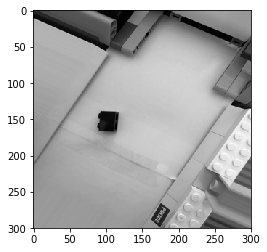

In [16]:
print ("Loaded {} images".format(len(train_data)))
plt.imshow(train_data[42][0], cmap = 'gist_gray')

In [17]:
trainImages = np.array([i[0] for i in train_data]).reshape(-1, IMG_Width, IMG_Heigth, 1)
trainLabels = np.array([i[1] for i in train_data])

In [18]:
print ((train_data[0][0]).shape)
print (trainLabels.shape)
print (trainLabels[0])

(300, 300)
(1164, 3)
[1 0 0]


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization
import numpy as np

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_Width, IMG_Heigth, 1)))
#print (model.output_shape)
#print (model.input_shape)
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
#changed from 2 to 3 as we now have 3 classes
model.add(Dense(3, activation = 'softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 149, 149, 32)      128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 73, 73, 64)        256       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 71, 71, 96)        55392     
__________

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
model.fit(trainImages, trainLabels, batch_size = 20, epochs = 15, verbose = 1)

Epoch 1/15
1164/1164 [==============================] - 287s 246ms/step - loss: 0.9991 - acc: 0.6031
Epoch 2/15
1164/1164 [==============================] - 280s 241ms/step - loss: 0.4169 - acc: 0.8265
Epoch 3/15
1164/1164 [==============================] - 266s 229ms/step - loss: 0.1912 - acc: 0.9253
Epoch 4/15
1164/1164 [==============================] - 262s 225ms/step - loss: 0.1406 - acc: 0.9536
Epoch 5/15
1164/1164 [==============================] - 265s 228ms/step - loss: 0.1050 - acc: 0.9639
Epoch 6/15
1164/1164 [==============================] - 255s 219ms/step - loss: 0.0464 - acc: 0.9828
Epoch 7/15
1164/1164 [==============================] - 247s 212ms/step - loss: 0.0482 - acc: 0.9854
Epoch 8/15
1164/1164 [==============================] - 240s 206ms/step - loss: 0.0743 - acc: 0.9708
Epoch 9/15
1164/1164 [==============================] - 255s 219ms/step - loss: 0.1226 - acc: 0.9579
Epoch 10/15
1164/1164 [==============================] - 254s 219ms/step - loss: 0.1081 - a

In [ ]:
def load_test_data():
    train_data = []
    DIR = './test/3001_11_Brick-2x4'
    for img in os.listdir(DIR):
        #label = os.path.split(DIR)[1]
        label = np.array([1, 0, 0])
        path = os.path.join(DIR, img)
        #if "DS_Store" not in path:
        img = Image.open(path)
        img = img.convert('L')
        img = img.resize((IMG_Width, IMG_Heigth), Image.ANTIALIAS)
        train_data.append([np.array(img), label])
    
    DIR = './test/3004_11_Brick-1x2'
    for img in os.listdir(DIR):
        #label = os.path.split(DIR)[1]
        label = np.array([0, 1, 0])
        path = os.path.join(DIR, img)
        #if "DS_Store" not in path:
        img = Image.open(path)
        img = img.convert('L')
        img = img.resize((IMG_Width, IMG_Heigth), Image.ANTIALIAS)
        train_data.append([np.array(img), label])
    
    DIR = './test/0000_00_No-Brick'
    for img in os.listdir(DIR):
        #label = os.path.split(DIR)[1]
        label = np.array([0, 0, 1])
        path = os.path.join(DIR, img)
        #if "DS_Store" not in path:
        img = Image.open(path)
        img = img.convert('L')
        img = img.resize((IMG_Width, IMG_Heigth), Image.ANTIALIAS)
        train_data.append([np.array(img), label])
    
    shuffle(train_data)
    return train_data

In [ ]:
test_data = load_test_data()
testImages = np.array([i[0] for i in test_data]).reshape(-1, IMG_Width, IMG_Heigth, 1)
testLabels = np.array([i[1] for i in test_data])

In [ ]:
loss, acc = model.evaluate(testImages, testLabels, verbose = 0)
print(acc * 100)

https://keras.io/getting-started/faq/#how-can-i-install-hdf5-or-h5py-to-save-my-models-in-keras

In [16]:
from keras.models import load_model

model.save('./output/lego-ic-keras-tf-v3.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
#model = load_model('my_model.h5')